In [34]:
import datetime
import yfinance as yf

In [74]:
ticker = "AAPL"
start_date = "2020-01-01"
end_date = datetime.datetime.now()

In [75]:
df = yf.download(ticker, start=start_date, end=end_date)
print(df.head())

C:\Users\pares\AppData\Local\Temp\ipykernel_21748\2645464837.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.620834  72.681281  71.373211  71.627084  135480400
2020-01-03  71.914841  72.676470  71.689980  71.847141  146322800
2020-01-06  72.487854  72.526541  70.783256  71.034717  118387200
2020-01-07  72.146919  72.753800  71.926892  72.497506  108872000
2020-01-08  73.307510  73.609745  71.849533  71.849533  132079200


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1382 entries, 2020-01-02 to 2025-07-02
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1382 non-null   float64
 1   (High, AAPL)    1382 non-null   float64
 2   (Low, AAPL)     1382 non-null   float64
 3   (Open, AAPL)    1382 non-null   float64
 4   (Volume, AAPL)  1382 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 64.8 KB


In [77]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,1382.000000,1382.000000,1382.000000,1382.000000,1.382000e+03
mean,157.740087,159.379111,155.922649,157.578244,8.765791e+07
std,44.393212,44.648909,44.060269,44.343020,5.217014e+07
min,54.378586,55.379539,51.528419,55.277748,2.323470e+07
25%,129.447327,131.035263,127.911747,129.329906,5.342708e+07
50%,156.988403,159.634925,154.908099,157.363695,7.362285e+07
75%,187.345131,188.335847,185.802556,187.163060,1.038669e+08
max,258.396667,259.474086,257.010028,257.568678,4.265100e+08


In [78]:
import matplotlib.pyplot as plt

In [79]:
df['Daily Return'] = df['Close'].pct_change()

<Axes: title={'center': '7-Day Rolling Volatility'}, xlabel='Date'>

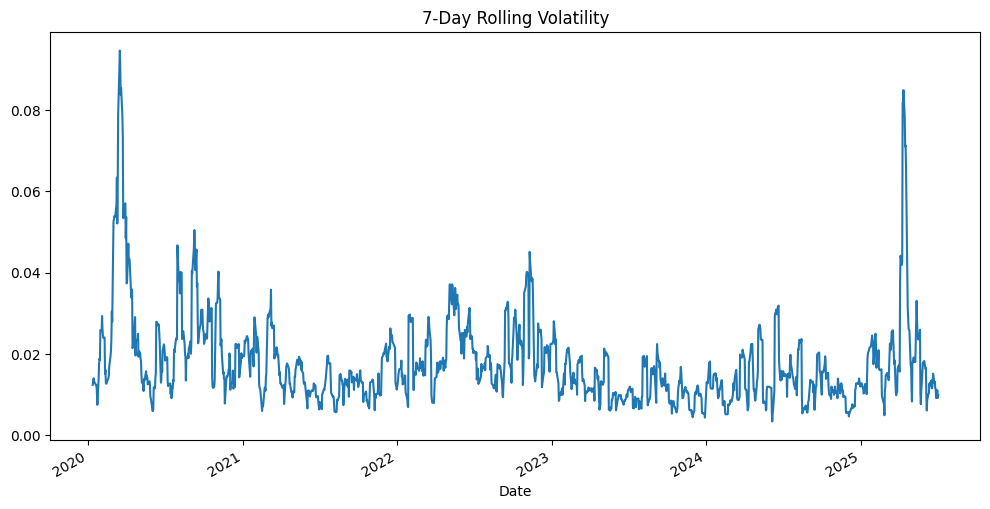

In [80]:
df['Volatility'] = df['Daily Return'].rolling(window=7).std()
df['Volatility'].plot(title='7-Day Rolling Volatility', figsize=(12,6))

In [81]:
import seaborn as sns

In [82]:
df.head(10)

Price,Close,High,Low,Open,Volume,Daily Return,Volatility
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2020-01-02,72.620834,72.681281,71.373211,71.627084,135480400,NaN,NaN
2020-01-03,71.914841,72.676470,71.689980,71.847141,146322800,-0.009722,NaN
2020-01-06,72.487854,72.526541,70.783256,71.034717,118387200,0.007968,NaN
2020-01-07,72.146919,72.753800,71.926892,72.497506,108872000,-0.004703,NaN
2020-01-08,73.307510,73.609745,71.849533,71.849533,132079200,0.016086,NaN
2020-01-09,74.864639,75.058066,74.035310,74.286764,170108400,0.021241,NaN
2020-01-10,75.033867,75.599656,74.530952,75.099154,140644800,0.002260,NaN
2020-01-13,76.636925,76.663525,75.232141,75.350622,121532000,0.021364,0.012432


<Axes: ylabel='Count'>

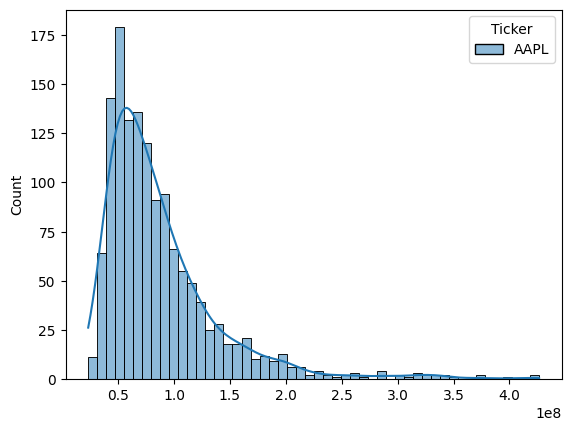

In [83]:
sns.histplot(df['Volume'], bins=50, kde=True)

C:\Users\pares\AppData\Local\Temp\ipykernel_21748\1817171375.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['Close'].resample('M').mean()


<Axes: title={'center': 'Monthly Average Close Price'}, xlabel='Date'>

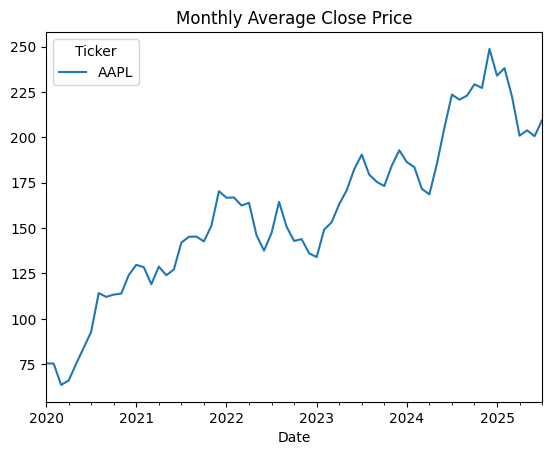

In [84]:
monthly_avg = df['Close'].resample('M').mean()
monthly_avg.plot(title='Monthly Average Close Price')

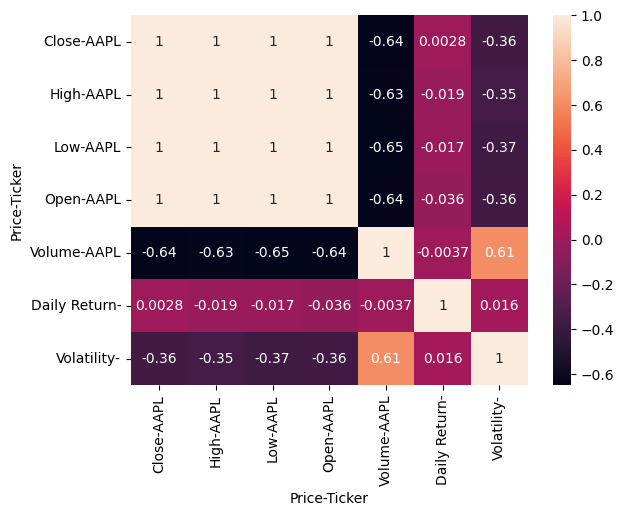

In [85]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [86]:
df['Lag_1_Close'] = df['Close'].shift(1)

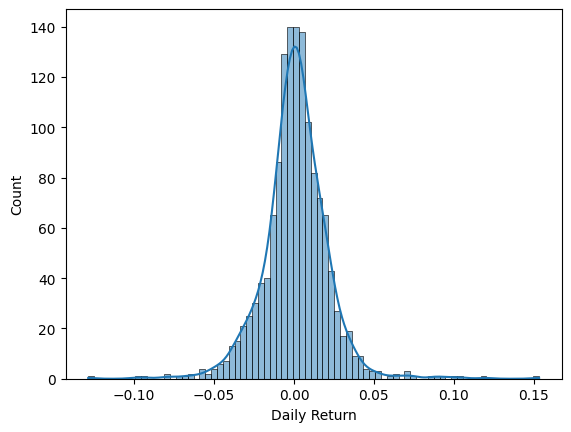

In [87]:
sns.histplot(df['Daily Return'],kde=True)
plt.show()

In [88]:
##df['Lag_1_Close'].dropna(inplace=True)
##df.dropna(inplace=True)

In [89]:
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()
df['MA_90'] = df['Close'].rolling(window=90).mean()
#df['Lag_1_Close'] = df['Close'].shift(1)


In [90]:
df.head(10)

Price,Close,High,Low,Open,Volume,Daily Return,Volatility,Lag_1_Close,MA_7,MA_30,MA_90
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,
Date,,,,,,,,,,,
2020-01-02,72.620834,72.681281,71.373211,71.627084,135480400,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,71.914841,72.676470,71.689980,71.847141,146322800,-0.009722,NaN,72.620834,NaN,NaN,NaN
2020-01-06,72.487854,72.526541,70.783256,71.034717,118387200,0.007968,NaN,71.914841,NaN,NaN,NaN
2020-01-07,72.146919,72.753800,71.926892,72.497506,108872000,-0.004703,NaN,72.487854,NaN,NaN,NaN
2020-01-08,73.307510,73.609745,71.849533,71.849533,132079200,0.016086,NaN,72.146919,NaN,NaN,NaN
2020-01-09,74.864639,75.058066,74.035310,74.286764,170108400,0.021241,NaN,73.307510,NaN,NaN,NaN
2020-01-10,75.033867,75.599656,74.530952,75.099154,140644800,0.002260,NaN,74.864639,73.196638,NaN,NaN
2020-01-13,76.636925,76.663525,75.232141,75.350622,121532000,0.021364,0.012432,75.033867,73.770365,NaN,NaN


In [91]:
df.dropna(inplace=True)

In [92]:
df.isnull().sum()

Price         Ticker
Close         AAPL      0
High          AAPL      0
Low           AAPL      0
Open          AAPL      0
Volume        AAPL      0
Daily Return            0
Volatility              0
Lag_1_Close             0
MA_7                    0
MA_30                   0
MA_90                   0
dtype: int64

In [93]:
df.head(10)

Price,Close,High,Low,Open,Volume,Daily Return,Volatility,Lag_1_Close,MA_7,MA_30,MA_90
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,
Date,,,,,,,,,,,
2020-05-11,76.552887,77.048637,74.664638,74.873636,145946400,0.015736,0.012554,75.366936,73.088946,67.378048,70.152061
2020-05-12,75.678001,77.690184,75.556493,77.238168,162301200,-0.011429,0.010925,76.552887,73.891609,67.842113,70.186030
2020-05-13,74.764275,76.781323,73.685277,75.857853,200622400,-0.012074,0.013828,75.678001,74.422132,68.279921,70.217690
2020-05-14,75.223557,75.284311,73.276986,74.001180,158929200,0.006143,0.013413,74.764275,74.865928,68.841131,70.248087
2020-05-15,74.778839,74.825013,72.956210,72.990236,166348400,-0.005912,0.013959,75.223557,75.139900,69.355042,70.277330
2020-05-18,76.540718,76.914967,75.413122,76.105723,135178400,0.023561,0.015768,74.778839,75.557887,69.956118,70.313255
2020-05-19,76.098450,77.405877,76.066856,76.557749,101729600,-0.005778,0.013965,76.540718,75.662389,70.372316,70.326964
2020-05-20,77.578407,77.648877,76.919825,76.958709,111504800,0.019448,0.014651,76.098450,75.808892,70.862404,70.355236


In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

features = ['Lag_1_Close','MA_7','MA_30','MA_90','Volume','Daily Return']
target = 'Close'

X = df[features]
y = df[target]

train_size = int(len(X)*0.8)
X_train,X_test = X.iloc[:train_size] , X.iloc[train_size:]
y_train,y_test = y.iloc[:train_size] , y.iloc[train_size:]

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 2.0143292289188914
Mean Absolute Error: 0.9904568227141837
R-squared: 0.9916345874652444


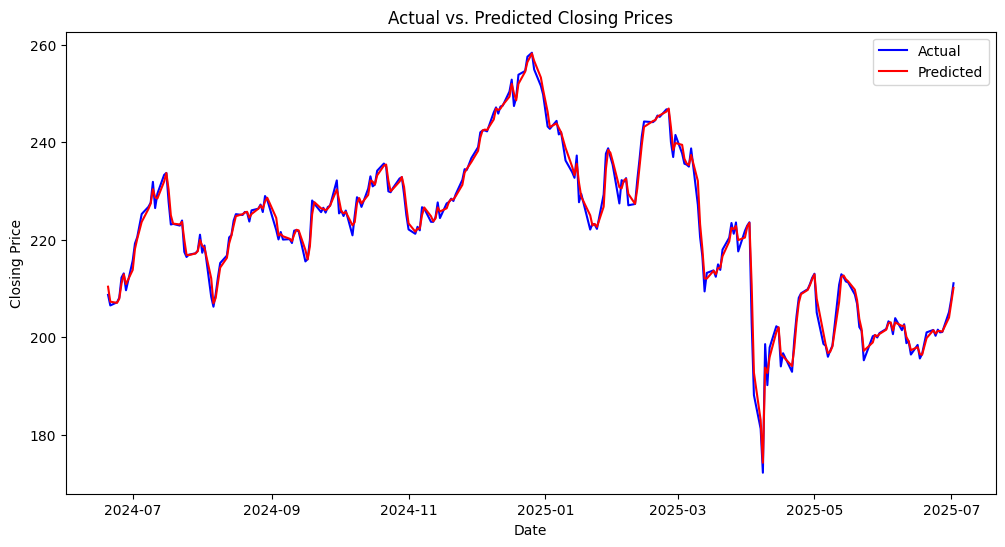

In [99]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual', color='blue',linestyle = "-")
plt.plot(y_test.index, y_pred, label='Predicted', color='red',linestyle="-")
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs. Predicted Closing Prices')
plt.legend()
plt.show()

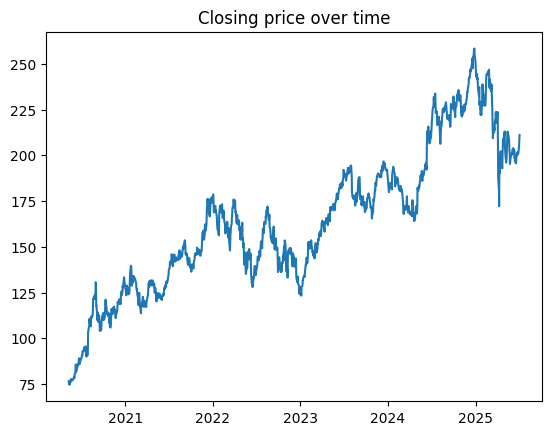

In [95]:
plt.plot(df['Close'])
plt.title('Closing price over time')
plt.show()

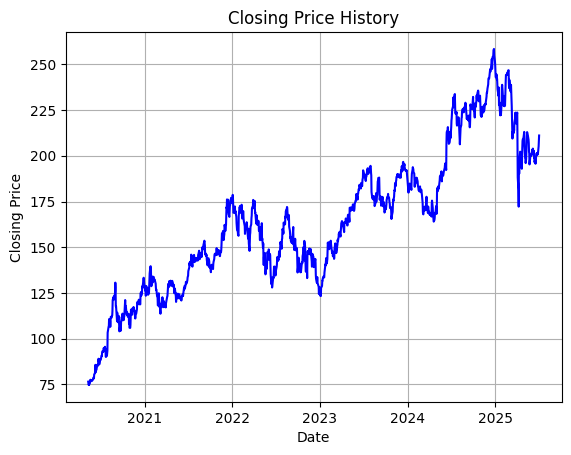

In [96]:
plt.plot(df['Close'],label="Closing Price",color='blue')
plt.title('Closing Price History')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)

plt.show()